<a href="https://colab.research.google.com/github/dcreeder89/study-of-literacy-rates-around-the-world/blob/main/Belt_Exam_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study of Literacy Rates Around the World (Practice Belt Exam)

- Christina Reeder
- 30 Nov 2022

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/Belt Exams/Stack 1/literacy_rates_updated.xlsx'
df = pd.read_excel(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3309 non-null   object 
 1   Country        3313 non-null   object 
 2   Year           3313 non-null   object 
 3   Age            3313 non-null   object 
 4   Gender         3313 non-null   object 
 5   Literacy rate  3308 non-null   float64
dtypes: float64(1), object(5)
memory usage: 155.4+ KB


,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011.0,<15,female,0.176121
1,Central and Southern Asia,Afghanistan,2011.0,<15,male,0.454171
2,NaN,Afghanistan,2011.0,15-24,female,0.321132
3,NaN,Afghanistan,2011.0,15-24,male,0.618791
4,Central and Southern Asia,Afghanistan,2011.0,25-64,female,0.084128


## 1. Use Python to Clean the Data

### ID and address any duplicate values

In [4]:
# Count the duplicates
df.duplicated().sum()

10

In [5]:
# Remove the duplicates 
df = df.drop_duplicates()
# Re-count duplicates after droping to ensure they are gone
df.duplicated().sum()

0

### ID and address any missing values in the dataset

In [6]:
# Count number of missing values in each column
df.isna().sum()

Region           4
Country          0
Year             0
Age              0
Gender           0
Literacy rate    5
dtype: int64

> There are 4 missing values in the region and 5 in the literacy rate, I will address the region values first.

#### Missing values in Region Column

In [7]:
# Create a filter for the missing values in the region column
region_na = df['Region'].isna()
df[region_na]

,Region,Country,Year,Age,Gender,Literacy rate
2,NaN,Afghanistan,2011.0,15-24,female,0.321132
3,NaN,Afghanistan,2011.0,15-24,male,0.618791
312,NaN,Uzbekistan,2016.0,65+,female,0.996697
313,NaN,Uzbekistan,2016.0,65+,male,0.999018


> The two countries with missing regions are Afghanistan and Uzbekistan. I will look at the dataframe and see if these countries have regions for other datapoints.

In [8]:
# display dataframe entries in which the country is Afghanistan
df[df['Country'] == 'Afghanistan'].head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011.0,<15,female,0.176121
1,Central and Southern Asia,Afghanistan,2011.0,<15,male,0.454171
2,NaN,Afghanistan,2011.0,15-24,female,0.321132
3,NaN,Afghanistan,2011.0,15-24,male,0.618791
4,Central and Southern Asia,Afghanistan,2011.0,25-64,female,0.084128


The Region for Afghanistan is Central and Southern Asia. I will change the missing values to that region for the country of Afghanistan

In [9]:
# Change region for Afghanistan to Central and Southern Asia
df.loc[df['Country'] == 'Afghanistan', 'Region'] = 'Central and Southern Asia'

# Check that it was changed by looking at dataframe entries for Afghanistan
df[df['Country'] == 'Afghanistan'].head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011.0,<15,female,0.176121
1,Central and Southern Asia,Afghanistan,2011.0,<15,male,0.454171
2,Central and Southern Asia,Afghanistan,2011.0,15-24,female,0.321132
3,Central and Southern Asia,Afghanistan,2011.0,15-24,male,0.618791
4,Central and Southern Asia,Afghanistan,2011.0,25-64,female,0.084128


> Afghanistan is corrected, now I will fix the Region for the Country of Uzbekistan

In [10]:
# display dataframe entries in which the country is Uzbekistan
df[df['Country'] == 'Uzbekistan'].tail()

,Region,Country,Year,Age,Gender,Literacy rate
309,Central and Southern Asia,Uzbekistan,2016.0,15-24,male,1.000000
310,Central and Southern Asia,Uzbekistan,2016.0,25-64,female,1.000000
311,Central and Southern Asia,Uzbekistan,2016.0,25-64,male,1.000000
312,NaN,Uzbekistan,2016.0,65+,female,0.996697
313,NaN,Uzbekistan,2016.0,65+,male,0.999018


> Uzbekistan is also located in Central and Southern Asia.

In [11]:
# Change region for Uzbekistan to Central and Southern Asia
df.loc[df['Country'] == 'Uzbekistan', 'Region'] = 'Central and Southern Asia'

# Check that it was changed by looking at dataframe entries for Uzbekistan
df[df['Country'] == 'Uzbekistan'].tail()

,Region,Country,Year,Age,Gender,Literacy rate
309,Central and Southern Asia,Uzbekistan,2016.0,15-24,male,1.000000
310,Central and Southern Asia,Uzbekistan,2016.0,25-64,female,1.000000
311,Central and Southern Asia,Uzbekistan,2016.0,25-64,male,1.000000
312,Central and Southern Asia,Uzbekistan,2016.0,65+,female,0.996697
313,Central and Southern Asia,Uzbekistan,2016.0,65+,male,0.999018


> The two missing values for Uzbekistan have been changed, now I will check the sum of missing values for the region column to see if they have all been fixed.

In [12]:
df.isna().sum()

Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    5
dtype: int64

> All missing values in the region column have been filled in.

#### Missing values in Literacy rate Column

In [13]:
# Look at dataframe entries with missing values in the literacy rate column
df[df['Literacy rate'].isna()]

,Region,Country,Year,Age,Gender,Literacy rate
498,Eastern and South-Eastern Asia,Singapore,2010.0,65+,male,NaN
608,Europe and Northern America,Albania,2012.0,15-24,female,NaN
753,Europe and Northern America,Portugal,2011.0,15-24,male,NaN
855,Europe and Northern America,Spain,2010.0,<15,female,NaN
884,Europe and Northern America,Spain,2013.0,25-64,male,NaN


> Our missing values in the literacy rate column are in the regions of 'Easterna dn South-Eastern Asia' and 'Europe and Northern America'.

In [14]:
# Look at all info for the literacy rate based on region
df.groupby('Region')['Literacy rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Central and Southern Asia,311.0,0.717900,0.274469,0.034743,0.527591,0.793692,0.981531,1.000000
Eastern and South-Eastern Asia,281.0,0.882885,0.172738,0.077059,0.846505,0.959194,0.984665,0.999424
Europe and Northern America,332.0,0.979203,0.033957,0.754773,0.980021,0.991000,0.996762,1.000000
Latin America and the Caribbean,940.0,0.906831,0.115190,0.102378,0.879480,0.949638,0.984031,0.999200
Northern Africa and Western Asia,568.0,0.851056,0.212635,0.092194,0.799950,0.955313,0.990015,0.999896
Oceania,96.0,0.911860,0.158227,0.268000,0.919811,0.985945,0.993087,0.998295
Sub-Saharan Africa,770.0,0.617746,0.272016,0.004025,0.408326,0.676226,0.857407,0.996000


> I can use the mean values for the two regions with missing literacy rates to fill in the missing values.

In [15]:
# Create filter to find missing values in eastern and south eastern asia region
asia_filter = df['Region'] == 'Eastern and South-Eastern Asia'
# Save mean literacy rate for eastern and south eastern asia region
asia_mean = df.loc[asia_filter, 'Literacy rate'].mean()

# Change literacy rate missing values for Eastern and South-Eastern Asia to mean value
df.loc[df['Region'] == 'Eastern and South-Eastern Asia', 'Literacy rate'] = asia_mean

# Check that it was changed by looking at dataframe entries for Afghanistan
df[df['Region'] == 'Eastern and South-Eastern Asia'].isna().sum()

Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

> Literacy rate missing value for the Eastern and South-Eastern Asia region has been changed successfully. Now I will do the same for the missing values in the Europe and North American Region.

In [16]:
# Create filter to find missing values in Europe and Northern America region
europe_filter = df['Region'] == 'Europe and Northern America'
# Save mean literacy rate for eastern and south eastern asia region
europe_mean = df.loc[europe_filter, 'Literacy rate'].mean()

# Change literacy rate missing values for Eastern and South-Eastern Asia to mean value
df.loc[df['Region'] == 'Europe and Northern America', 'Literacy rate'] = europe_mean

# Check that it was changed by looking at dataframe entries for Afghanistan
df[df['Region'] == 'Europe and Northern America'].isna().sum()

Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

> The Europe and Northern America region missing values have been changed. Now I will check that all missing values have been successfully changed

In [17]:
# Count all missing values in the dataframe
df.isna().sum()

Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

> All missing values have been successfully changed.

### Ensure all columns match the datatypes in the data dictionary

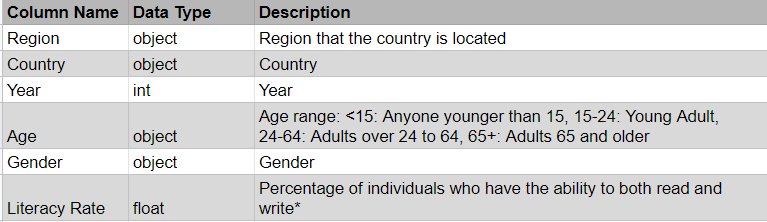

In [18]:
# Check datatypes of all columns in dataframe
df.dtypes

Region            object
Country           object
Year              object
Age               object
Gender            object
Literacy rate    float64
dtype: object

> The only datatype that does not match the data dictionary is the year. I will first try to simply change the datatype to int.

In [19]:
# Change datatype of year column to int (I commented it out to get rid of the error in my run code)
# df['Year'] = df['Year'].astype(int)

> There is an error in simply changing the datatype since some of the data has non-numerical characters. 

In [20]:
# Count all the different values in the Year column
df['Year'].value_counts()

2018.0    574
2011.0    454
2014.0    439
2010.0    400
2012.0    344
2015.0    316
2013.0    264
2016.0    264
2017.0    246
2011_       1
3014.0      1
Name: Year, dtype: int64

> Looks like there is one data value labeled as '2011_' with the underscore character. I will have to change this value to exclude the underscore, then I will be able to change the datatype to int. 

In [21]:
# Change the one year value of '2011_' to 2011
df.loc[df['Year'] == '2011_', 'Year'] = 2011

In [22]:
# Change the datatype of the year column to int
df['Year'] = df['Year'].astype(int)

In [23]:
# Check datatypes of the dataframe
df.dtypes

Region            object
Country           object
Year               int64
Age               object
Gender            object
Literacy rate    float64
dtype: object

> Now, all the datatypes match the data dictionary provided.

### ID and address any inconsistencies in categorical values

> I'll check the value counts for the object and int type columns to ensure a consistancy in the categorical values.

In [24]:
# Check values in Region column
df['Region'].value_counts()

Latin America and the Caribbean     940
Sub-Saharan Africa                  770
Northern Africa and Western Asia    568
Europe and Northern America         336
Central and Southern Asia           311
Eastern and South-Eastern Asia      282
Oceania                              96
Name: Region, dtype: int64

> It looks like there is a consistancy in the categorical values in the Region column

In [25]:
# Check values in Country column
# pd.set_option('display.max_rows', None)
# df['Country'].value_counts().sort_index()

> There was a consistancy in the categorical values in the country column. I commented out the value_counts() since it was a lot to look at in the code. 

In [26]:
# Check values in Year column
df['Year'].value_counts().sort_index()

2010    400
2011    455
2012    344
2013    264
2014    439
2015    316
2016    264
2017    246
2018    574
3014      1
Name: Year, dtype: int64

> It looks like there is one value of 3014 that is most likely supposed to be 2014, so I will change that.

In [27]:
# Change year value of 3014 to 2014
df.loc[df['Year'] == 3014, 'Year'] = 2014

# Recheck values in Year column to check change
df['Year'].value_counts().sort_index()

2010    400
2011    455
2012    344
2013    264
2014    440
2015    316
2016    264
2017    246
2018    574
Name: Year, dtype: int64

> There is now a consistancy in the values in the Year column

In [28]:
# Check values in Age column
df['Age'].value_counts()

<15      840
15-24    826
25-64    826
65+      811
Name: Age, dtype: int64

> There is consistincy in the categorical values in the Age column

In [30]:
# Check values in Gender column
df['Gender'].value_counts()

female    1648
male      1648
F            4
M            3
Name: Gender, dtype: int64

> There is some data with a 'F' instead of 'female' and a 'M' instead of 'male'. I will need to fix these.

In [31]:
# Change 'F' in the gender column to 'female'
df.loc[df['Gender'] == 'F', 'Gender'] = 'female'

# Change 'M' in the gender column to 'male'
df.loc[df['Gender'] == 'M', 'Gender'] = 'male'

In [32]:
# Check values in Gender column
df['Gender'].value_counts()

female    1652
male      1651
Name: Gender, dtype: int64

> There is now consistancy in the values in the Gender column. This is the final column with categorical values. Therefore, the dataset is consistant through all columns. 

### ID and address any inappropriate or unusual data points

> We have already looked at the categories for the Year and Age columns, and delt with any inconsistancies and inappropriate data points. Therefore, we will now look at the Literacy rate column to ensure the data makes sense. The Literacy rate value should be between 0-1, as it represents a percentage of literacy.

In [35]:
df['Literacy rate'].describe()

count    3303.000000
mean        0.817523
std         0.229240
min         0.004025
25%         0.745635
50%         0.908835
75%         0.979203
max         1.000000
Name: Literacy rate, dtype: float64

> The min and max values in the Literacy rate column are between 0-1. Therefore, there are no unusual data points in this column.

## 2. Complete an exploration of the data using Python

### Two different types of univariate exploratory visualizations.

#### Histogram of Literacy Rate

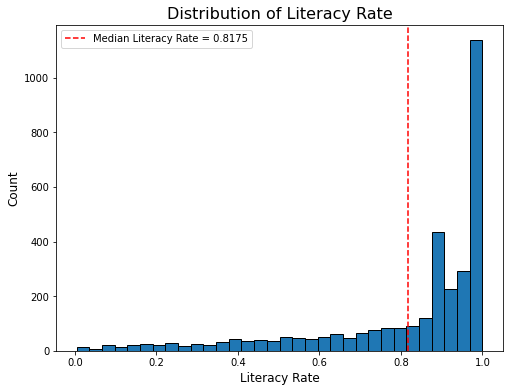

In [69]:
# plot histogram for the literacy rate of the dataset
plt.figure(figsize = (8,6));
plt.hist(df['Literacy rate'], bins = 'auto', edgecolor = 'black'); #Create histogram
plt.xlabel('Literacy Rate', fontsize = 12);
plt.ylabel('Count', fontsize = 12);
plt.title('Distribution of Literacy Rate', fontsize = 16);

# Add vertical line for median value of literacy rate
median = df['Literacy rate'].mean();
plt.axvline(median, color = 'red', linestyle = '--',
            label = f'Median Literacy Rate = {median:,.4f}')
plt.legend();#display legend

> Most citizens the data is taken from have a high literacy rate. There are high counts of literacy above the median Literacy Rate of 0.8175. The lower the literacy rate, the lower the number of datapoints there are in the dataset.

#### Boxplot of Literacy Rate by Region

In [73]:
# Create a list for each region with the literacy rate values
# list for Latin America and the Caribbean Region
lamerica = df.loc[df['Region'] == 'Latin America and the Caribbean', 'Literacy rate'].values;
# list for Sub-Saharan Africa Region
subsaharan = df.loc[df['Region'] == 'Sub-Saharan Africa', 'Literacy rate'].values;
# list for Northern Africa and Western Asia Region
nafrica = df.loc[df['Region'] == 'Northern Africa and Western Asia', 'Literacy rate'].values;
# list for Europe and Northern America Region
europe = df.loc[df['Region'] == 'Europe and Northern America', 'Literacy rate'].values;
# list for Central and Southern Asia Region
casia = df.loc[df['Region'] == 'Central and Southern Asia', 'Literacy rate'].values;
# list for Eastern and South-Eastern Asia Region
easia = df.loc[df['Region'] == 'Eastern and South-Eastern Asia', 'Literacy rate'].values;
# list for Oceania Region
oceania = df.loc[df['Region'] == 'Oceania', 'Literacy rate'].values;

In [78]:
# Ignore warnings when displaying plots
import warnings
warnings.filterwarnings('ignore')

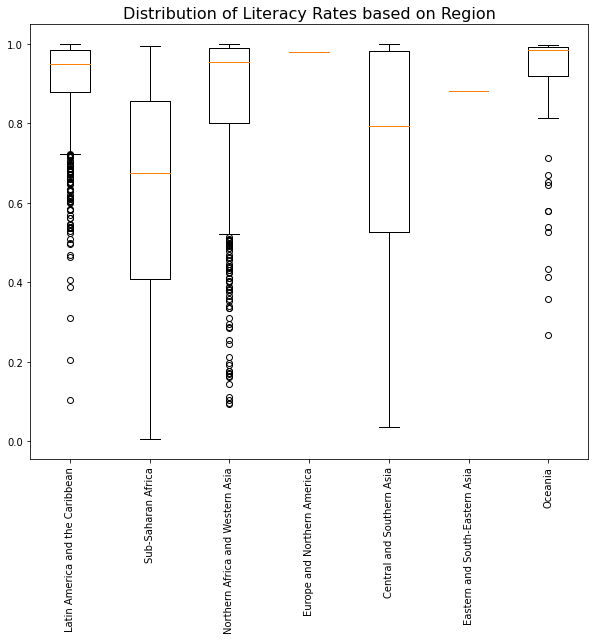

In [81]:
# Display boxplots for literacy rate based on Region
plt.figure(figsize = (10,8));
plt.boxplot([lamerica, subsaharan, nafrica, europe, casia, easia, oceania],
            labels = ['Latin America and the Caribbean', 
                      'Sub-Saharan Africa',
                      'Northern Africa and Western Asia', 
                      'Europe and Northern America',
                      'Central and Southern Asia',
                      'Eastern and South-Eastern Asia',
                      'Oceania']);
plt.xticks(rotation = 90);
plt.title('Distribution of Literacy Rates based on Region', fontsize = 16);

> The Literacy rates in the regions of 'Europe and Northern America' and 'Eastern and South-Eastern Asia' are at one solid rate, with no variations across the years, genders, and age ranges. 

> The literacy rates in the regions of 'Central and Southern Asia' and 'Sub-Saharan Africa' are widely spread. All the literacy rates in those regions are evenly spread throughout the entire range of around 0-1.

> As for the remaining 3 regions. Their literacy rates are mostly grouped in the range of 0.6 - 1, meaning those regions have a fairly high literacy. There are some low outliers, but the majority of the data is high literacy.

### Two different types of multivariate exploratory visualizations

#### Heatmap of the dataset

In [36]:
# calculate correlation matrix
corr = df.corr()

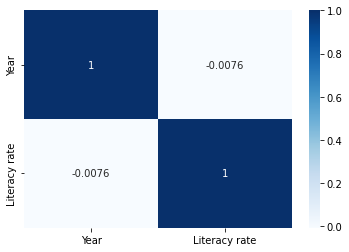

In [38]:
# Display heatmap with correlation values
sns.heatmap(corr, cmap = 'Blues', annot = True);

> As the only two numerical values, the heatmap only shows the correlation between Year and Literacy rate. The heatmap shows that there is no correlation between the two values in the data, as seen by the correlation coefficient of -0.0076.

#### Scatterplot of Region vs. Literacy rate

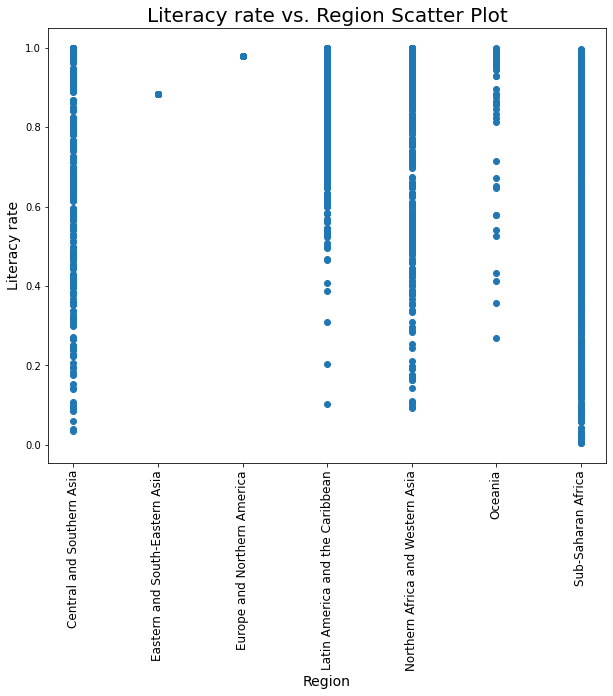

In [58]:
# Create a scatterplot of the Region vs. the Literacy Rate
plt.figure(figsize = (10,8))
plt.scatter(df['Region'], df['Literacy rate']);
plt.xticks(rotation = 90, fontsize = 12);
plt.xlabel('Region', fontsize = 14);
plt.ylabel('Literacy rate', fontsize = 14);
plt.title('Literacy rate vs. Region Scatter Plot', fontsize = 20);

> This scatterplot shows me that the lowest literacy rates are seen in the regions of 'Central and Southern Asia', 'Latin America and the Caribbean', 'Northern Africa and Western Asia', and 'Sub-Saharan Africa'. These are also the regions with the most varied literacy rate.

> The regions of 'Eastern and South-Eastern Asia' and 'Europe and Northern America' have a very tight spread in their literacy rate. With 'Europe and Northern America' having an almost perfect literacy rate in the dataset. 

> The region of 'Oceania' has a relatively varied literacy rate, such as with the regions first discussed. However, their lowest literacy rate is higher than those regions. 